In [48]:
from qiskit import *
from qiskit import IBMQ
import math
from qiskit.tools.visualization import plot_histogram

# The complete circuit (classically controlled gates are not possible yet)

In [49]:
# Here we generate the random control bits for A and B.
randomBit_A=ClassicalRegister(1)
randomBit_B=ClassicalRegister(1)
randomQubit=QuantumRegister(2)
bellQubits=QuantumRegister(2)
resultBits=ClassicalRegister(2)
qc=QuantumCircuit(randomBit_A,randomBit_B,randomQubit,bellQubits,resultBits);


# Create the random input for A and B
qc.h(randomQubit[0])
qc.h(randomQubit[1])
qc.measure(randomQubit[0],randomBit_A)
qc.measure(randomQubit[1],randomBit_B)

# Create the Bell states (we need 01-10)
qc.h(bellQubits[0])
qc.cx(bellQubits[0],bellQubits[1])
qc.cz(bellQubits[0],bellQubits[1])
qc.x(bellQubits[1])

# turn the Measurement bases.
qc.h(bellQubits[0]).c_if(randomBit_A,1)
qc.u3(2.3562,0,0,bellQubits[1])
qc.u3(-2.3562*2,0,0,bellQubits[1]).c_if(randomBit_B,1)

# Measure now System A and B in the standard bases.
qc.measure(bellQubits,resultBits)

qc.draw()

In [40]:
# Just verify that we really get the state vector.
job=execute(qc,Aer.get_backend('statevector_simulator'))
print(job.result().get_statevector())

[ 0.        +0.j -0.70710678+0.j  0.70710678+0.j  0.        +0.j]


# Experiment for Bell00 (A measures Q, B measures S) 

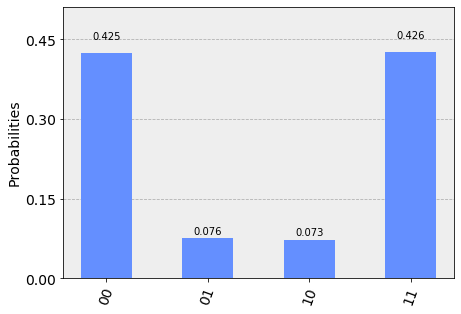

In [28]:
# Here we generate the random control bits for A and B.
bellQubits=QuantumRegister(2)
resultBits=ClassicalRegister(2)
qc=QuantumCircuit(bellQubits,resultBits);

# Create the Bell states (we need 01-10)
qc.h(bellQubits[0])
qc.cx(bellQubits[0],bellQubits[1])
qc.cz(bellQubits[0],bellQubits[1])
qc.x(bellQubits[1])

# turn the Measurement bases.
#qc.h(bellQubits[0]) 
qc.u3(2.3562,0,0,bellQubits[1])
#qc.u3(-2.3562*2,0,0,bellQubits[1]) 

# Measure now System A and B in the standard bases.
qc.measure(bellQubits,resultBits)

job=execute(qc,Aer.get_backend('qasm_simulator'),shots=10000)
r=job.result().get_counts()
plot_histogram(r)


# Experiment for  Bell10 (A measures R, B measures S)

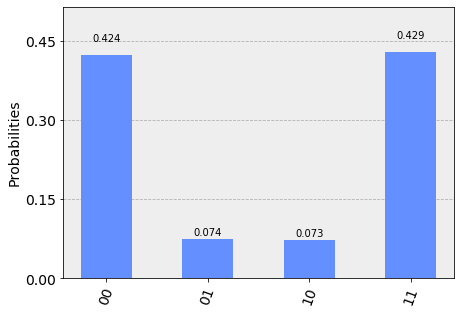

In [31]:
# Here we generate the random control bits for A and B.
bellQubits=QuantumRegister(2)
resultBits=ClassicalRegister(2)
qc=QuantumCircuit(bellQubits,resultBits);

# Create the Bell states (we need 01-10)
qc.h(bellQubits[0])
qc.cx(bellQubits[0],bellQubits[1])
qc.cz(bellQubits[0],bellQubits[1])
qc.x(bellQubits[1])

# turn the Measurement bases.
qc.h(bellQubits[0]) 
qc.u3(2.3562,0,0,bellQubits[1])
#qc.u3(-2.3562*2,0,0,bellQubits[1]) 

# Measure now System A and B in the standard bases.
qc.measure(bellQubits,resultBits)

job=execute(qc,Aer.get_backend('qasm_simulator'),shots=10000)
r=job.result().get_counts()
plot_histogram(r)

# Experiment for Bell01 (A measures Q, B measures T)

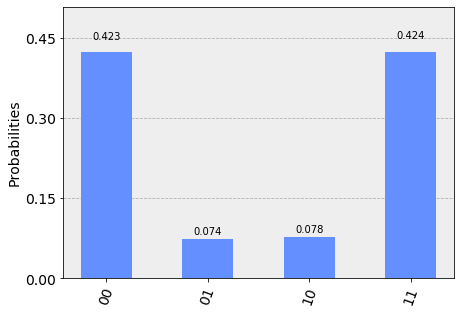

In [32]:
# Here we generate the random control bits for A and B.
bellQubits=QuantumRegister(2)
resultBits=ClassicalRegister(2)
qc=QuantumCircuit(bellQubits,resultBits);

# Create the Bell states (we need 01-10)
qc.h(bellQubits[0])
qc.cx(bellQubits[0],bellQubits[1])
qc.cz(bellQubits[0],bellQubits[1])
qc.x(bellQubits[1])

# turn the Measurement bases.
#qc.h(bellQubits[0]) 
qc.u3(2.3562,0,0,bellQubits[1])
qc.u3(-2.3562*2,0,0,bellQubits[1]) 

# Measure now System A and B in the standard bases.
qc.measure(bellQubits,resultBits)

job=execute(qc,Aer.get_backend('qasm_simulator'),shots=10000)
r=job.result().get_counts()
plot_histogram(r)

# Experiment for Bell11 (A measures R, B measures T)

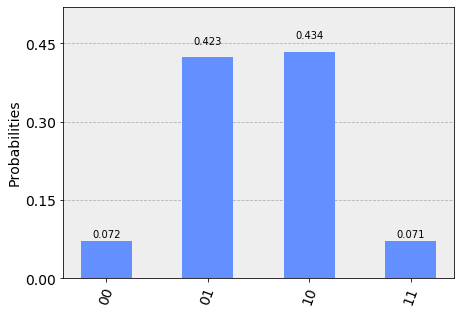

In [51]:
# Here we generate the random control bits for A and B.
bellQubits=QuantumRegister(2)
resultBits=ClassicalRegister(2)
qc=QuantumCircuit(bellQubits,resultBits);

# Create the Bell states (we need 01-10)
qc.h(bellQubits[0])
qc.cx(bellQubits[0],bellQubits[1])
qc.cz(bellQubits[0],bellQubits[1])
qc.x(bellQubits[1])

# turn the Measurement bases.
qc.h(bellQubits[0]) 
qc.u3(2.3562,0,0,bellQubits[1])
qc.u3(-2.3562*2,0,0,bellQubits[1]) 

# Measure now System A and B in the standard bases.
qc.measure(bellQubits,resultBits)

job=execute(qc,Aer.get_backend('qasm_simulator'),shots=10000)
r=job.result().get_counts()
plot_histogram(r)

# Execute a circuit on a device

In [50]:
IBMQ.load_account()

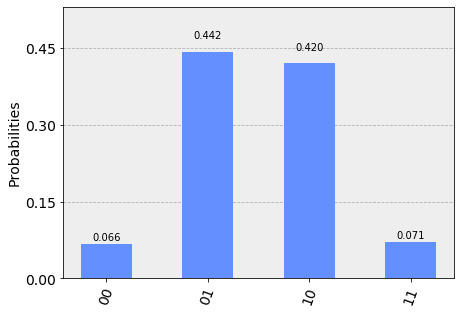

In [52]:
# Note: Choose one of the above Bell00, Bell01, Bell10, Bell11 circuits as qc.

provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
#for backend in provider.backends():
#    print( backend.status() )
#real_device = provider.get_backend('ibmqx2')
real_device = provider.get_backend('ibmq_qasm_simulator')
job=execute(qc,real_device)
r2=job.result().get_counts()
plot_histogram(r2)

# Our result (ibmqx2 hardware)

In [46]:
res00=[388,77,72,487]
res01=[350,117,101,456]
res10=[410,141,66,407]
res11=[64,490,285,185]

v0=(res00[0]+res00[3]-res00[1]-res00[2])/(res00[0]+res00[3]+res00[1]+res00[2])
v1=(res01[0]+res01[3]-res01[1]-res01[2])/(res01[0]+res01[3]+res01[1]+res01[2])
v2=(res10[0]+res10[3]-res10[1]-res10[2])/(res10[0]+res10[3]+res10[1]+res10[2])
v3=(res11[0]+res11[3]-res11[1]-res11[2])/(res11[0]+res11[3]+res11[1]+res11[2])

# Each should be sqrt(1/2) or -sqrt(1/2). The sum could be roughly 2.8
print(v0,v1,v2,v3," ==> ",v0+v1+v2-v3)

0.708984375 0.57421875 0.595703125 -0.513671875  ==>  2.392578125
